In [1]:
# notebook that produces all plots for UBE3A_HUN_paper

import matplotlib.pyplot as plt
import config
% matplotlib inline

modes = ['UBE3A','CAMK2D']


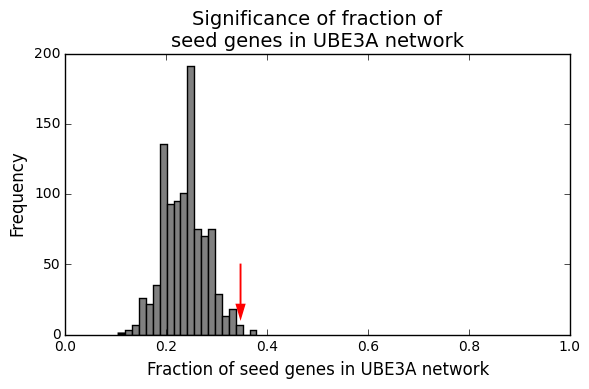

Significance of fraction of seed genes that are retained in UBE3A network: 0.01


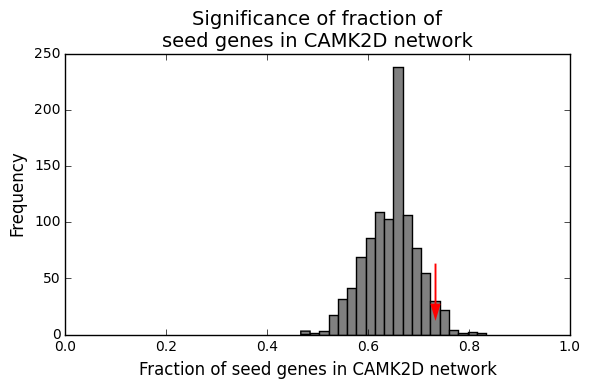

Significance of fraction of seed genes that are retained in CAMK2D network: 0.06


In [2]:
# UBE3A and CAMK2D network
# plot the distribution of the fraction of seeds retained in the randomly built networks 
# and compare to the fraction of seeds in the real network

for mode in modes:
    file_graphs = config.output_path + 'summary_test_signif_' + mode + '_QBCHL_rand_graph_stats.txt'
    file1 = open(file_graphs,'r')
    entries_graphs = file1.readlines()
    file1.close()

    fracs_seeds = []
    for line in entries_graphs[1:]:
        tab_list = str.split(line[:-1],'\t')
        seeds_in_n = int(tab_list[2])
        seeds_start = int(tab_list[1])
        frac_seeds = seeds_in_n/float(seeds_start)
        if tab_list[0] == 'real':
            real_frac = frac_seeds
        else:
            fracs_seeds.append(frac_seeds)

    plt.hist(fracs_seeds,bins=20,color="grey")
    plt.xlabel('Fraction of seed genes in ' + mode + ' network',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.title('Significance of fraction of\nseed genes in ' + mode + ' network',fontsize=14)
    plt.xlim([0,1])
    ax = plt.gca()
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    x = xlim[1] - xlim[0]
    y = ylim[1] - ylim[0]
    plt.arrow(real_frac,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
    plt.tight_layout()
    plt.savefig(config.plot_path + 'QBCHL_signif_frac_seeds_in_' + mode + '_network.pdf')
    plt.show()

    num_fracs_larger = filter(lambda x: x >= real_frac,fracs_seeds)
    print 'Significance of fraction of seed genes that are retained in', mode, 'network:', float(len(num_fracs_larger))/len(fracs_seeds)

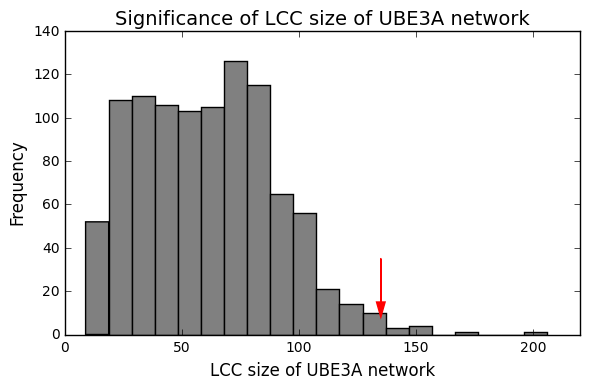

Significance of LCC size of UBE3A network: 0.011


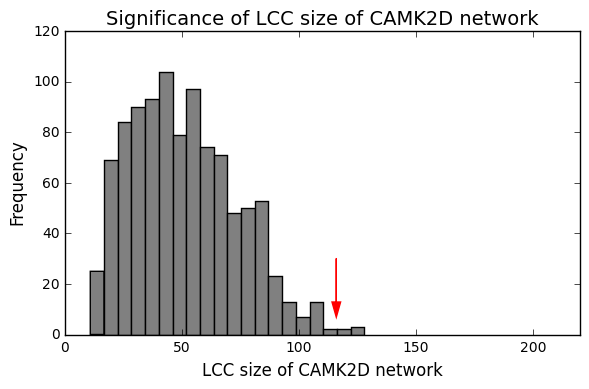

Significance of LCC size of CAMK2D network: 0.005


In [3]:
# UBE3A and CAMK2D network
# plot the distribution of the LCC size of the randomly built networks 
# and compare to the LCC size of the real network

for m,mode in enumerate(modes):
    file_graphs = config.output_path + 'summary_test_signif_' + mode + '_QBCHL_rand_graph_stats.txt'
    file1 = open(file_graphs,'r')
    entries_graphs = file1.readlines()
    file1.close()

    lcc_sizes = []
    for line in entries_graphs[1:]:
        tab_list = str.split(line[:-1],'\t')
        lcc_size = int(tab_list[5])
        if tab_list[0] == 'real':
            real_lcc = lcc_size
        else:
            lcc_sizes.append(lcc_size)

    plt.hist(lcc_sizes,bins=20,color="grey")
    plt.xlabel('LCC size of ' + mode + ' network',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.title('Significance of LCC size of ' + mode + ' network',fontsize=14)
    plt.xlim([0,220])
    ax = plt.gca()
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    x = xlim[1] - xlim[0]
    y = ylim[1] - ylim[0]
    plt.arrow(real_lcc,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
    plt.tight_layout()
    plt.savefig(config.plot_path + 'QBCHL_signif_LCCsize_in_' + mode + '_network.pdf')
    plt.show()

    num_lccs_larger = filter(lambda x: x >= real_lcc,lcc_sizes)
    print 'Significance of LCC size of', mode, 'network:', float(len(num_lccs_larger))/len(lcc_sizes)

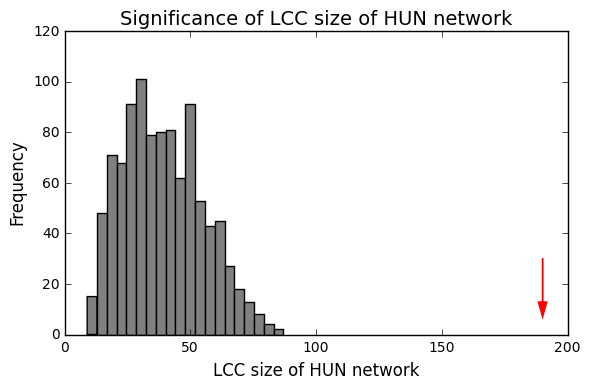

Significance of LCC size of HUN network: 0.0


In [4]:
# HUN network
# plot the distribution of the LCC size of the randomly built networks 
# and compare to the LCC size of the real network
infile_rand = config.output_path + 'HUN_network_QBCHL.node_attributes_rand_lccs.txt'
file1 = open(infile_rand,'r')
entries = file1.readlines()
file1.close()
lcc_sizes = []
for line in entries[1:]:
    tab_list = str.split(line[:-1],'\t')
    lcc_size = int(tab_list[1])
    if tab_list[0] == 'real':
        real_lcc = lcc_size
    else:
        lcc_sizes.append(lcc_size)
    
plt.hist(lcc_sizes,bins=20,color="grey")
plt.xlabel('LCC size of HUN network',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Significance of LCC size of HUN network',fontsize=14)
plt.xlim([0,200])
ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
x = xlim[1] - xlim[0]
y = ylim[1] - ylim[0]
plt.arrow(real_lcc,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
plt.tight_layout()
plt.savefig(config.plot_path + 'QBCHL_signif_LCCsize_in_HUN_network.pdf')
plt.show()

num_lccs_larger = filter(lambda x: x >= real_lcc,lcc_sizes)
print 'Significance of LCC size of HUN network:', float(len(num_lccs_larger))/len(lcc_sizes)

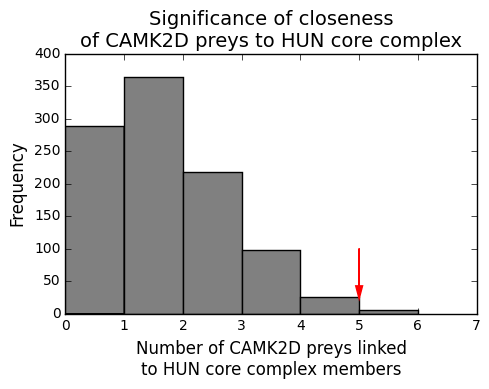

Significance of number of CAMK2D preys linked to HUN core complex members: 0.006


In [5]:
# CAMK2D - HUN complex closeness
# draw the distribution of the number of CAMK2D preys that interact with HUN core complex proteins 
# as obtained from randomized networks and show where the real observation lies
infile_rand = config.output_path + 'CAMK2D_HUN_counts_preys_connected_to_core_complex_members_rand_distr.txt'
file1 = open(infile_rand,'r')
entries = file1.readlines()
file1.close()
rand_values = []
for line in entries[1:]:
    tab_list = str.split(line[:-1],'\t')
    value = int(tab_list[1])
    if tab_list[0] == 'real':
        real_count = value
    else:
        rand_values.append(value)
    
plt.figure(figsize=(5,4))
plt.hist(rand_values,bins=range(7),color="grey")
plt.xlabel('Number of CAMK2D preys linked\nto HUN core complex members',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Significance of closeness\nof CAMK2D preys to HUN core complex',size=14)
plt.xlim([0,7])
ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
x = xlim[1] - xlim[0]
y = ylim[1] - ylim[0]
plt.arrow(real_count,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
plt.tight_layout()
plt.savefig(config.plot_path + 'CAMK2D_HUN_counts_preys_connected_to_core_complex_members.pdf')
plt.show()

num_more = filter(lambda x: x >= real_count,rand_values)
print 'Significance of number of CAMK2D preys linked to HUN core complex members:', float(len(num_more))/len(rand_values)

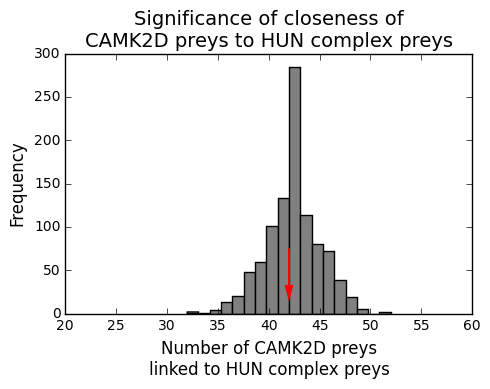

Significance of number of CAMK2D preys linked to HUN complex preys: 0.618


In [6]:
# CAMK2D - HUN complex closeness
# draw the distribution of the number of CAMK2D preys that interact with HUN complex preys
# as obtained from randomized networks and show where the real observation lies
infile_rand = config.output_path + 'CAMK2D_HUN_counts_preys_connected_to_complex_preys_rand_distr.txt'
file1 = open(infile_rand,'r')
entries = file1.readlines()
file1.close()
rand_values = []
for line in entries[1:]:
    tab_list = str.split(line[:-1],'\t')
    value = int(tab_list[1])
    if tab_list[0] == 'real':
        real_count = value
    else:
        rand_values.append(value)
    
plt.figure(figsize=(5,4))
plt.hist(rand_values,bins=18,color="grey")
plt.xlabel('Number of CAMK2D preys\nlinked to HUN complex preys',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Significance of closeness of\nCAMK2D preys to HUN complex preys',size=14)
plt.xlim([20,60])
ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
x = xlim[1] - xlim[0]
y = ylim[1] - ylim[0]
plt.arrow(real_count,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
plt.tight_layout()
plt.savefig(config.plot_path + 'CAMK2D_HUN_counts_preys_connected_to_complex_preys.pdf')
plt.show()

num_more = filter(lambda x: x >= real_count,rand_values)
print 'Significance of number of CAMK2D preys linked to HUN complex preys:', float(len(num_more))/len(rand_values)

Significance of number of HUN complex preys linked to CAMK2D preys: 0.032


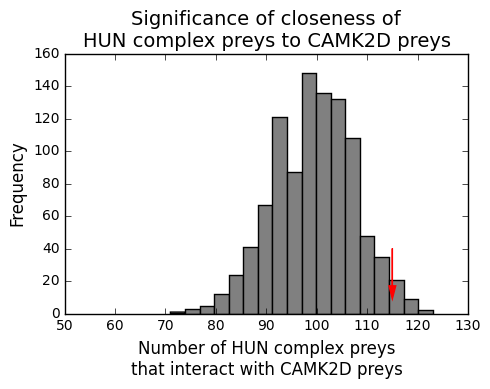

In [7]:
# CAMK2D - HUN complex closeness
# draw the distribution of the number of HUN complex members that interact with 
# CAMK2D preys as obtained from randomized networks and show where the real observation lies
infile_rand = config.output_path + 'CAMK2D_HUN_counts_complex_preys_connected_to_preys_rand_distr.txt'
file1 = open(infile_rand,'r')
entries = file1.readlines()
file1.close()
rand_values = []
for line in entries[1:]:
    tab_list = str.split(line[:-1],'\t')
    value = int(tab_list[1])
    if tab_list[0] == 'real':
        real_count = value
    else:
        rand_values.append(value)
    
plt.figure(figsize=(5,4))
plt.hist(rand_values,bins=18,color="grey")
plt.xlabel('Number of HUN complex preys\nthat interact with CAMK2D preys',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Significance of closeness of\nHUN complex preys to CAMK2D preys',size=14)
plt.xlim([50,130])
ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
x = xlim[1] - xlim[0]
y = ylim[1] - ylim[0]
plt.arrow(real_count,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
plt.tight_layout()
plt.savefig(config.plot_path + 'CAMK2D_HUN_counts_complex_preys_connected_to_preys.pdf')

num_more = filter(lambda x: x >= real_count,rand_values)
print 'Significance of number of HUN complex preys linked to CAMK2D preys:', float(len(num_more))/len(rand_values)

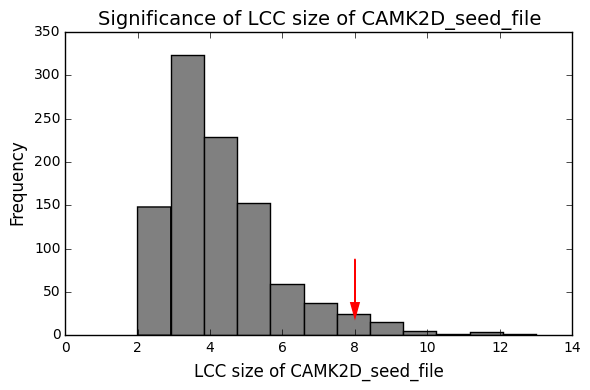

Significance of LCC size of CAMK2D_seed_file 0.051


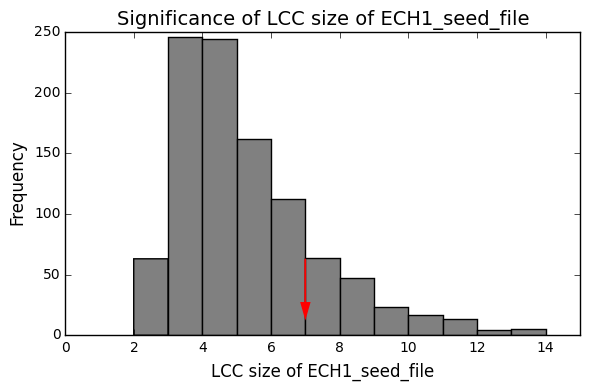

Significance of LCC size of ECH1_seed_file 0.173


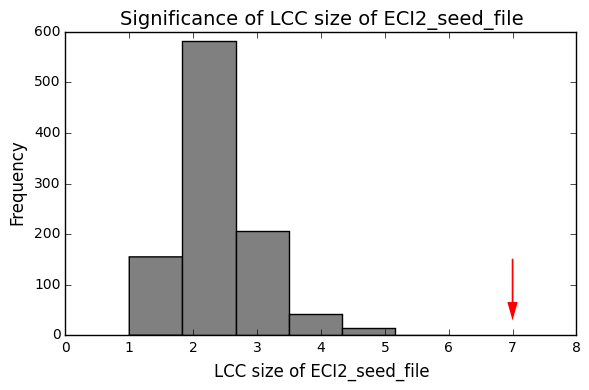

Significance of LCC size of ECI2_seed_file 0.0


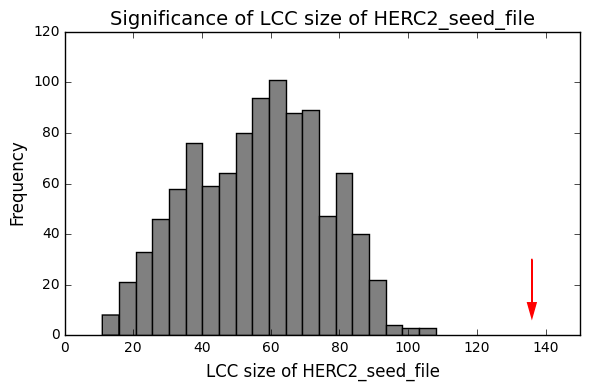

Significance of LCC size of HERC2_seed_file 0.0


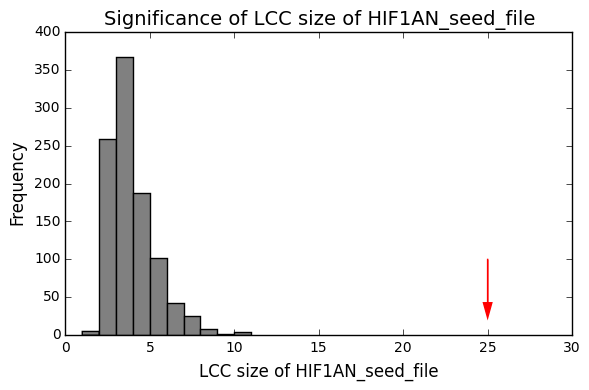

Significance of LCC size of HIF1AN_seed_file 0.0


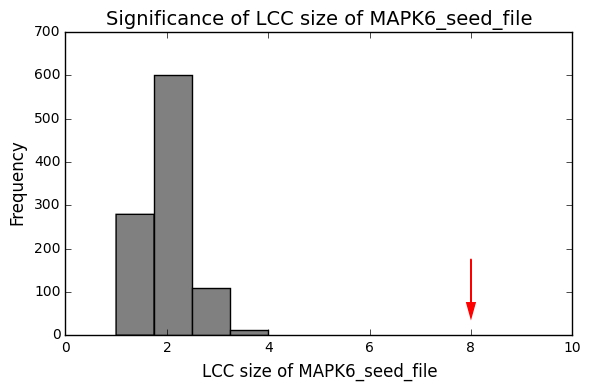

Significance of LCC size of MAPK6_seed_file 0.0


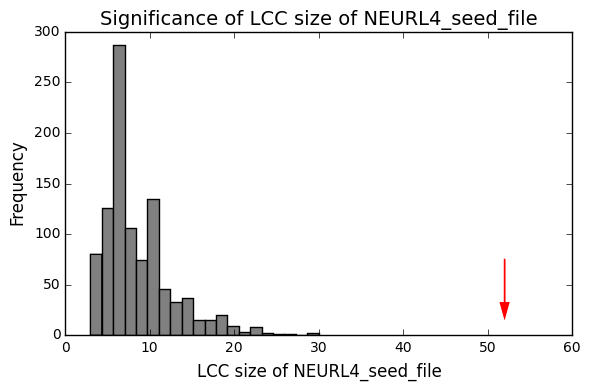

Significance of LCC size of NEURL4_seed_file 0.0


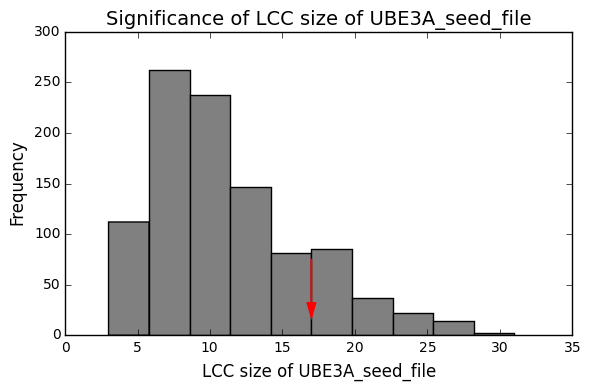

Significance of LCC size of UBE3A_seed_file 0.16


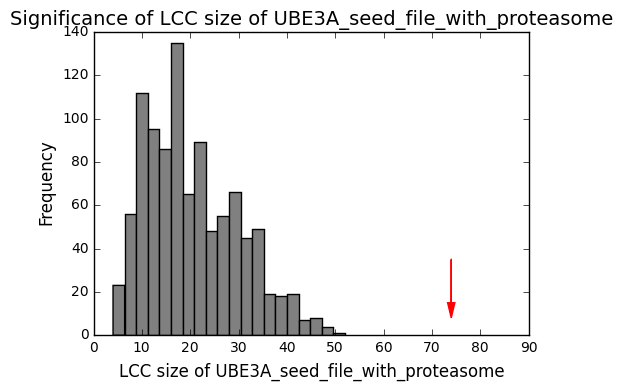

Significance of LCC size of UBE3A_seed_file_with_proteasome 0.0


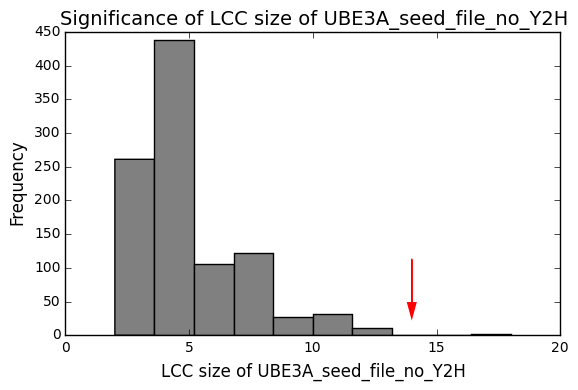

Significance of LCC size of UBE3A_seed_file_no_Y2H 0.004


In [8]:
# significance of closeness of preys per bait
xupper = [14,15,8,150,30,10,60,35,90,20]
num_bins = [12,12,6,20,10,4,20,10,20,10]
seed_files = ['CAMK2D_seed_file.txt','ECH1_seed_file.txt','ECI2_seed_file.txt','HERC2_seed_file.txt',\
  'HIF1AN_seed_file.txt','MAPK6_seed_file.txt','NEURL4_seed_file.txt','UBE3A_seed_file.txt',\
  'UBE3A_seed_file_with_proteasome.txt','UBE3A_seed_file_no_Y2H.txt']
for i,seed_file in enumerate(seed_files):
    infile_rand = config.output_path + seed_file[:-4] + '_rand_lccs.txt'
    file1 = open(infile_rand,'r')
    entries = file1.readlines()
    file1.close()
    lcc_sizes = []
    for line in entries[1:]:
        tab_list = str.split(line[:-1],'\t')
        lcc_size = (float(tab_list[1]))
        if tab_list[0] == 'real':
            real_lcc = lcc_size
        else:
            lcc_sizes.append(lcc_size)

    plt.hist(lcc_sizes,bins=num_bins[i],color="grey")
    plt.xlabel('LCC size of ' + seed_file[:-4],fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.title('Significance of LCC size of ' + seed_file[:-4],fontsize=14)
    plt.xlim([0,xupper[i]])
    ax = plt.gca()
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    x = xlim[1] - xlim[0]
    y = ylim[1] - ylim[0]
    plt.arrow(real_lcc,y/4.0,0,y/7.0*(-1),color='red',head_width=x/60.0,head_length=y/20.0)
    plt.tight_layout()
    plt.savefig(config.plot_path + 'QBCHL_signif_LCCsize_in_' + seed_file[:-4] + '.pdf')
    plt.show()

    num_lccs_larger = filter(lambda x: x >= real_lcc,lcc_sizes)
    print 'Significance of LCC size of ' + seed_file[:-4], float(len(num_lccs_larger))/len(lcc_sizes)
